# Custom Tasks

The following provides an example workflow of creating a blueprint with a pre-existing
custom task.

Please note that for the time being, custom tasks should be created through
the [DataRobot Python Client](https://datarobot-public-api-client.readthedocs-hosted.com/en/v2.27.0/reference/modeling/spec/custom_task.html)
or via the UI.

In [ ]:
from datarobot_bp_workshop import Workshop

w = Workshop()

## Find Custom Tasks

In [75]:
w.search_tasks('awesome task')

Awesome Model: [CUSTOMR_6019ae978cc598a46199cee1] 
  - This is the best model ever.

In [76]:
w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1

Awesome Model: [CUSTOMR_6019ae978cc598a46199cee1] 
  - This is the best model ever.

In [77]:
w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1(w.TaskInputs.NUM)

Awesome Model (CUSTOMR_6019ae978cc598a46199cee1)

Input Summary: Numeric Data
Output Method: TaskOutputMethod.PREDICT

Task Parameters:
  version_id (version_id) = latest_6019ae978cc598a46199cee1

In [78]:
w.CustomTask('CUSTOMR_6019ae978cc598a46199cee1')

Awesome Model (CUSTOMR_6019ae978cc598a46199cee1)

Input Summary: (None)
Output Method: TaskOutputMethod.PREDICT

Task Parameters:
  version_id (version_id) = latest_6019ae978cc598a46199cee1

In [79]:
w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1.versions

Latest (latest_6019ae978cc598a46199cee1): str

v3.0 (6019e2418311cc8207a5f8e1): str

v2.10 (6019dff0509159ede309f9c9): str

v2.9 (6019dc3b8311cc8207a5f7d9): str

v2.8 (6019dbcb4f6322a6283883d9): str

v2.7 (6019db4d041c71bd7ea1c670): str

v2.6 (6019da5d4f6322a628388364): str

v2.5 (6019d924be257008648e3c62): str

v2.4 (6019d7db3d7d080b078e3c39): str

v2.3 (6019d744356f3c430b38828d): str

v2.2 (6019d305be257008648e3c0c): str

v2.1 (6019d2e045e619fc03a2eead): str

v2.0 (6019d2bd3d7d080b078e3b66): str

v1.3 (6019cf0735270cbe238e3c76): str

v1.2 (6019b9fdbf5b0a42aba1c6e9): str

v1.1 (6019b81729ae9ab5ad8e3c26): str

v1.0 (6019afe4dcd97e1e5ebfee13): str

## Build a blueprint with a custom task

In [80]:
pni = w.Tasks.PNI2(w.TaskInputs.NUM)
rdt = w.Tasks.RDT5(pni)
binning = w.Tasks.BINNING(pni)
customr = w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1(rdt, binning)
custom_bp = w.BlueprintGraph(customr, name='My Fun Custom Blueprint').save()

## Set custom task version

In [81]:
customr.version = w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1.versions.v2_7

In [82]:
customr

Awesome Model (CUSTOMR_6019ae978cc598a46199cee1)

Input Summary: Smooth Ridit Transform (RDT5) | Binning of numerical variables (BINNING)
Output Method: TaskOutputMethod.PREDICT

Task Parameters:
  version_id (version_id) = 6019db4d041c71bd7ea1c670

In [83]:
customr.version = w.CustomTasks.CUSTOMR_6019ae978cc598a46199cee1.versions.Latest

In [84]:
custom_bp.save()

Name: 'My Fun Custom Blueprint'

Input Data: Numeric
Tasks: Missing Values Imputed | Smooth Ridit Transform | Binning of numerical variables | Awesome Model

### Find, View, and Train

In [85]:
bps = list(w.list(limit=3))

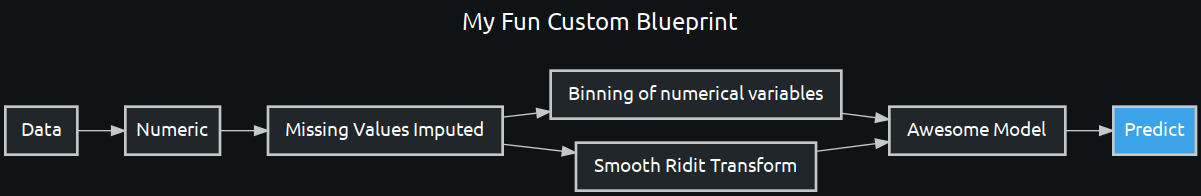

In [86]:
bps[0].show()

In [87]:
custom_bp.train(project_id=project_id)

Name: 'My Fun Custom Blueprint'

Input Data: Numeric
Tasks: Missing Values Imputed | Smooth Ridit Transform | Binning of numerical variables | Awesome Model

In [88]:
custom_bp.delete()

Blueprint deleted.
